In [1]:
# 기본 라이브러리 설정_08_03_01
import os
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# 데이터 로딩 및 데이터 표준화_08_03_02
data_good_folder = 'data_good/'
data_bad_folder = 'data_bad/'

def load_data_from_folder(folder, label):
    data_frames = []
    for file_name in os.listdir(folder):
        if file_name.startswith('merged_') and file_name.endswith('.csv'):
            file_path = os.path.join(folder, file_name)
            df = pd.read_csv(file_path)
            df['Label'] = label  # 승부조작 경기는 1, 일반경기는 0으로 레이블 설정
            data_frames.append(df)
    return pd.concat(data_frames, ignore_index=True)
data_good = load_data_from_folder(data_good_folder, 0)
data_bad = load_data_from_folder(data_bad_folder, 1)
merged_data = pd.concat([data_good, data_bad], ignore_index=True)
X = merged_data[['HomeWin', 'Standoff', 'GuestWin']]
y = merged_data['Label']

# 데이터 표준화 (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)


In [3]:
# TensorFlow 모델 생성 및 분석_08_03_03
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
# 테스트 데이터로 예측
y_pred = model.predict(X_test)
y_pred = [1 if pred[1] > pred[0] else 0 for pred in y_pred]
# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['일반경기', '승부조작'])
print(f"모델의 정확도: {accuracy}")
print(f"분류 보고서:\n{report}")

# 모델 저장loss: 0.4390, accuracy: 0.8007
model.save("matchfixing_model.keras")


Epoch 1/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6202 - loss: 0.6330 - val_accuracy: 0.7029 - val_loss: 0.5629
Epoch 2/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7060 - loss: 0.5582 - val_accuracy: 0.7352 - val_loss: 0.5345
Epoch 3/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7283 - loss: 0.5367 - val_accuracy: 0.7397 - val_loss: 0.5268
Epoch 4/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7432 - loss: 0.5137 - val_accuracy: 0.7607 - val_loss: 0.5242
Epoch 5/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7586 - loss: 0.5191 - val_accuracy: 0.7502 - val_loss: 0.5089
Epoch 6/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7593 - loss: 0.4992 - val_accuracy: 0.7547 - val_loss: 0.5069
Epoch 7/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7439 - loss: 0.5081 - val_accuracy: 0.7749 - val_loss: 0.4945
Epoch 8/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7590 - loss: 0.4847 - val_accu

Epoch 1/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8306 - loss: 0.3879 - val_accuracy: 0.8067 - val_loss: 0.4376
Epoch 2/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8301 - loss: 0.4040 - val_accuracy: 0.8019 - val_loss: 0.4304
Epoch 3/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8201 - loss: 0.4133 - val_accuracy: 0.8121 - val_loss: 0.4202
Epoch 4/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8278 - loss: 0.3941 - val_accuracy: 0.8157 - val_loss: 0.4106
Epoch 5/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8276 - loss: 0.3928 - val_accuracy: 0.8181 - val_loss: 0.4143
Epoch 6/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8315 - loss: 0.3897 - val_accuracy: 0.8253 - val_loss: 0.4076
Epoch 7/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8290 - loss: 0.3906 - val_accuracy: 0.8277 - val_loss: 0.4052
Epoch 8/100
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8392 - loss: 0.3868 - val_accu

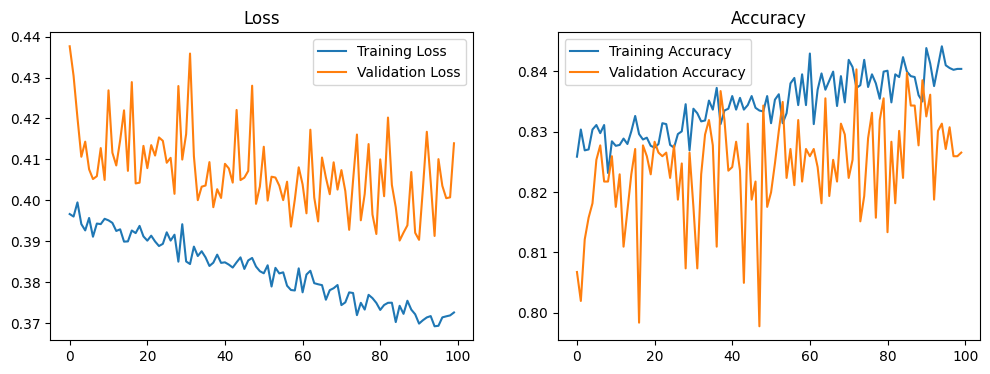

In [4]:
# 모형 성능평가 시각화
import matplotlib.pyplot as plt

# 모델 학습
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

# 손실 함수와 정확도 그래프 그리기
plt.figure(figsize=(12, 4))

# Training Loss와 Validation Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

# Training Accuracy와 Validation Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step


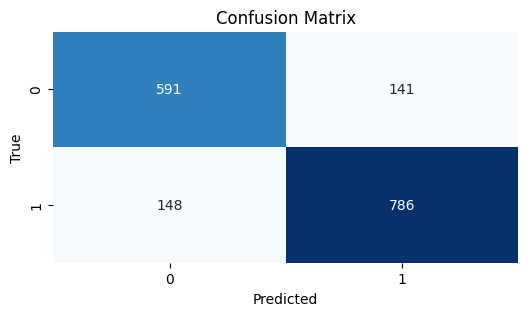

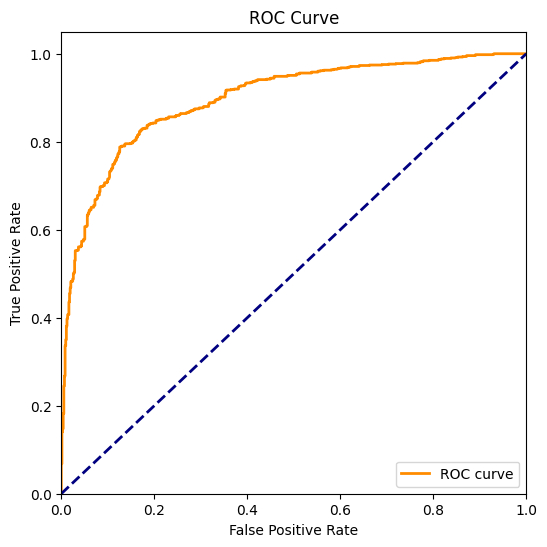

ROC AUC Score: 0.90


In [7]:
# 이원분류 차트 및 ROC 곡선
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# 실제 승부조작 여부와 모델의 예측 결과를 가져옵니다.
y_true = y_test  # 실제 승부조작 여부 (0 또는 1)
y_pred = model.predict(X_test)[:, 1]  # 모델의 예측 승부조작 확률

# Confusion Matrix 그리기
cm = confusion_matrix(y_true, (y_pred > 0.5).astype(int))
plt.figure(figsize=(6, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve 그리기
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# ROC AUC Score 출력
roc_auc = roc_auc_score(y_true, y_pred)
print(f'ROC AUC Score: {roc_auc:.2f}')
